In [1]:
import geopandas as gpd
%matplotlib inline

## Volta catchment stations

In [ ]:
df_volta = gpd.read_file(r"T:\@ak\GaugingStations.shp")
df_volta.plot()

In [ ]:
df_volta_sel = df_volta[df_volta['SHOW'] == 1.0][['NAMESTATIO', 'ALERT', 'geometry']]
df_volta_sel.columns = ['station_name', 'alert', 'geometry']

In [ ]:
print(df_volta_sel.to_json())

In [ ]:
df_volta_sel.head()

In [ ]:
df_volta_sel.to_file(r"D:\Projects\Pr\3723.10\Werkfolder\volta_stations.shp")

## Oti catchment stations

In [ ]:
df_oti = gpd.read_file(r"T:\@ak\Oti_Station_locs_UTM31N.shp")
df_oti.plot()

In [ ]:
df_oti_sel = df_oti[df_volta['SHOW'] == 1.0][['NAME', 'ALERT', 'geometry']]
df_oti_sel.columns = ['station_name', 'alert', 'geometry']

In [ ]:
print(df_oti_sel.to_json())

## Overview Catchments 

In [2]:
df_catchments = gpd.read_file(r"D:\Projects\Pr\3723.10\Toeleveringen\2018-09-06 van Jan H - shapefiles\PR3723_Ecowas_catchments_dissolved\ecowas_hybas_af_level04_05_dissolved_hkv_wgs84.shp")

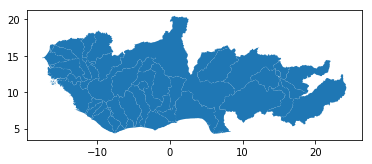

In [3]:
df_catchments.plot()

In [4]:
df_catchments
df_catchments_sel = df_catchments[['NAME_HKV', 'geometry']]
df_catchments_sel.columns = ['catchment_name', 'geometry']

In [5]:
print(df_catchments_sel.to_json())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [6]:
df_catchments_sel.head()

,catchment_name,geometry
0,-1,"POLYGON ((16.51250000000002 13.19166666666669,..."
1,-10,(POLYGON ((-5.379166666666645 6.21250000000001...
2,-11,(POLYGON ((-17.46388888888887 14.6458333333333...
3,-12,POLYGON ((-15.11249999999998 15.00416666666669...
4,-13,POLYGON ((-11.44166666666665 17.82500000000003...


In [ ]:
df_catchments_sel.to_file(r"D:\Projects\Pr\3723.10\Werkfolder\catchments_raw.shp")

## Read result of simplified shapefile

In [7]:
df_catchments_smp = gpd.read_file(r"D:\Projects\Pr\3723.10\Werkfolder\catchments.shp")

In [8]:
df_catchments_smp.head()

,FID,geometry
0,0,"POLYGON ((16.42916666666669 13.42500000000003,..."
1,1,POLYGON ((-5.379166666666645 6.212500000000016...
2,2,POLYGON ((-17.53333333333331 14.74583333333336...
3,3,POLYGON ((-16.35833333333331 15.43333333333336...
4,4,POLYGON ((-10.31666666666664 17.99583333333337...


In [9]:
df_catchments_smp.loc[:,'catchment_name'] = df_catchments_sel['catchment_name']

In [10]:
df_catchments_smp.head()

,FID,geometry,catchment_name
0,0,"POLYGON ((16.42916666666669 13.42500000000003,...",-1
1,1,POLYGON ((-5.379166666666645 6.212500000000016...,-10
2,2,POLYGON ((-17.53333333333331 14.74583333333336...,-11
3,3,POLYGON ((-16.35833333333331 15.43333333333336...,-12
4,4,POLYGON ((-10.31666666666664 17.99583333333337...,-13


In [11]:
df_catchments_smp.loc[:,'alert'] = 0

In [12]:
df_catchments_smp.at[42, 'alert'] = 1 # set warning level for volta catchment

In [13]:
df_catchments_smp = df_catchments_smp[['catchment_name', 'alert', 'geometry']]

In [33]:
# from Polygon to LineString
for idx, row in df_catchments_smp.iterrows():
    geom = row['geometry']
    df_catchments_smp.at[idx, 'geometry'] = geom.boundary
    #row['geometry'] = 
    #df_catchments_smp
    #print(idx)#, ))

## To DataPortal

In [14]:
from hkvportal.io.services import dataportal as dp
dp = dp()

In [15]:
dp.setDataservice(dataservice = 'https://dmws.hkvservices.nl/dataportal/')

dataservice is set. https://dmws.hkvservices.nl/dataportal/ will be used as portal


In [ ]:
dp.createDatabase(database = 'EWSECOWAS')

#### Upload Volta Stations

In [ ]:
dp.setEntryDatabase(database = 'EWSECOWAS', 
                    key = 'volta_stations', 
                    data = df_volta_sel.to_json(), 
                    description = 'stations of volta bassin/catchment')

#### Upload Oti Stations

In [ ]:
dp.setEntryDatabase(database = 'EWSECOWAS', 
                    key = 'oti_stations', 
                    data = df_oti_sel.to_json(), 
                    description = 'stations of oti bassin/catchment')

#### Upload Catchments

In [16]:
dp.setEntryDatabase(database = 'EWSECOWAS', 
                    key = 'catchments_polygon', 
                    data = df_catchments_smp.to_json(), 
                    description = 'all catchment geometries')

{'id': '02a1fc8c-844e-4e82-9164-264c3290a47c',
 'key': 'catchments_polygon',
 'date': '2018-09-19 06:15:40'}

#### Return data from database

In [17]:
dp.getEntryDatabase(database = 'EWSECOWAS', 
                    key = 'catchments_polygon')

https://dmws.hkvservices.nl/dataportal/data.asmx/read?database=EWSECOWAS&key=catchments_polygon


{'type': 'FeatureCollection',
 'features': [{'id': '0',
   'type': 'Feature',
   'properties': {'catchment_name': '-1', 'alert': 0},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[16.42916666666669, 13.42500000000003],
      [16.44675971137155, 13.465740288628503],
      [16.48507554796009, 13.47881334092885],
      [16.584135945638042, 13.454901801215309],
      [16.66007554796009, 13.520480007595516],
      [16.684079996744813, 13.49526604546444],
      [16.71741333007815, 13.513067287868955],
      [16.798257785373288, 13.525353325737878],
      [16.83238474527997, 13.546100701226159],
      [16.837854851616775, 13.497547743055586],
      [16.89070943196617, 13.467422485351593],
      [16.90933261447485, 13.487982008192304],
      [16.951742214626762, 13.467019992404545],
      [17.006591118706623, 13.470480007595517],
      [17.031160481770858, 13.486894904242652],
      [17.089672851562526, 13.49106157090932],
      [17.10833333333336, 13.545833333333364],
      [17.1478